In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

print(tf.__version__)

1.13.1


In [12]:
import datetime
import mlflow


class MLFlowCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        mlflow.log_metric("loss", logs['loss'], step=epoch)
        mlflow.log_metric("val_loss", logs['val_loss'], step=epoch)

In [13]:
mlflow.set_experiment("Overfit and underfit")

In [14]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [15]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [16]:
train_data.shape

(25000, 10000)

In [17]:
test_data.shape

(25000, 10000)

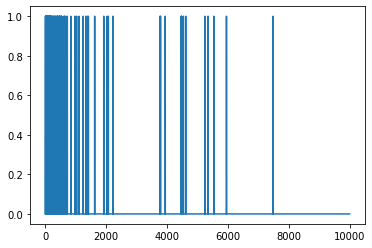

In [18]:
plt.plot(train_data[0])

In [19]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
with mlflow.start_run(run_name="base_model"):
    baseline_history = baseline_model.fit(train_data,
                                          train_labels,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(test_data, test_labels),
                                          callbacks=[MLFlowCallback()],
                                          verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4770 - acc: 0.8124 - binary_crossentropy: 0.4770 - val_loss: 0.3351 - val_acc: 0.8757 - val_binary_crossentropy: 0.3351
Epoch 2/20
 - 4s - loss: 0.2500 - acc: 0.9102 - binary_crossentropy: 0.2500 - val_loss: 0.2843 - val_acc: 0.8884 - val_binary_crossentropy: 0.2843
Epoch 3/20
 - 4s - loss: 0.1835 - acc: 0.9349 - binary_crossentropy: 0.1835 - val_loss: 0.2913 - val_acc: 0.8848 - val_binary_crossentropy: 0.2913
Epoch 4/20
 - 4s - loss: 0.1493 - acc: 0.9478 - binary_crossentropy: 0.1493 - val_loss: 0.3217 - val_acc: 0.8748 - val_binary_crossentropy: 0.3217
Epoch 5/20
 - 4s - loss: 0.1227 - acc: 0.9595 - binary_crossentropy: 0.1227 - val_loss: 0.3362 - val_acc: 0.8749 - val_binary_crossentropy: 0.3362
Epoch 6/20
 - 4s - loss: 0.1003 - acc: 0.9691 - binary_crossentropy: 0.1003 - val_loss: 0.3660 - val_acc: 0.8720 - val_binary_crossentropy: 0.3660
Epoch 7/20
 - 4s - loss: 0.0816 - acc: 0.9755 - binary_crossentropy:

In [21]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
with mlflow.start_run(run_name="small_model"):
    smaller_history = smaller_model.fit(train_data,
                                        train_labels,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(test_data, test_labels),
                                        callbacks=[MLFlowCallback()],
                                        verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6373 - acc: 0.6354 - binary_crossentropy: 0.6373 - val_loss: 0.5919 - val_acc: 0.6973 - val_binary_crossentropy: 0.5919
Epoch 2/20
 - 4s - loss: 0.5447 - acc: 0.7878 - binary_crossentropy: 0.5447 - val_loss: 0.5271 - val_acc: 0.7875 - val_binary_crossentropy: 0.5271
Epoch 3/20
 - 4s - loss: 0.4806 - acc: 0.8557 - binary_crossentropy: 0.4806 - val_loss: 0.4829 - val_acc: 0.8256 - val_binary_crossentropy: 0.4829
Epoch 4/20
 - 4s - loss: 0.4316 - acc: 0.8905 - binary_crossentropy: 0.4316 - val_loss: 0.4490 - val_acc: 0.8548 - val_binary_crossentropy: 0.4490
Epoch 5/20
 - 4s - loss: 0.3576 - acc: 0.9166 - binary_crossentropy: 0.3576 - val_loss: 0.3368 - val_acc: 0.8841 - val_binary_crossentropy: 0.3368
Epoch 6/20
 - 4s - loss: 0.2350 - acc: 0.9287 - binary_crossentropy: 0.2350 - val_loss: 0.2871 - val_acc: 0.8882 - val_binary_crossentropy: 0.2871
Epoch 7/20
 - 4s - loss: 0.1865 - acc: 0.9402 - binary_crossentropy:

In [23]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [24]:
with mlflow.start_run(run_name="big_model"):
    bigger_history = bigger_model.fit(train_data, train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      callbacks=[MLFlowCallback()],
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.3502 - acc: 0.8517 - binary_crossentropy: 0.3502 - val_loss: 0.3135 - val_acc: 0.8702 - val_binary_crossentropy: 0.3135
Epoch 2/20
 - 4s - loss: 0.1508 - acc: 0.9436 - binary_crossentropy: 0.1508 - val_loss: 0.3294 - val_acc: 0.8739 - val_binary_crossentropy: 0.3294
Epoch 3/20
 - 4s - loss: 0.0527 - acc: 0.9844 - binary_crossentropy: 0.0527 - val_loss: 0.4331 - val_acc: 0.8680 - val_binary_crossentropy: 0.4331
Epoch 4/20
 - 4s - loss: 0.0084 - acc: 0.9986 - binary_crossentropy: 0.0084 - val_loss: 0.5761 - val_acc: 0.8684 - val_binary_crossentropy: 0.5761
Epoch 5/20
 - 4s - loss: 0.0016 - acc: 0.9999 - binary_crossentropy: 0.0016 - val_loss: 0.6573 - val_acc: 0.8709 - val_binary_crossentropy: 0.6573
Epoch 6/20
 - 4s - loss: 2.9471e-04 - acc: 1.0000 - binary_crossentropy: 2.9471e-04 - val_loss: 0.6938 - val_acc: 0.8719 - val_binary_crossentropy: 0.6938
Epoch 7/20
 - 4s - loss: 1.6562e-04 - acc: 1.0000 - binary_c

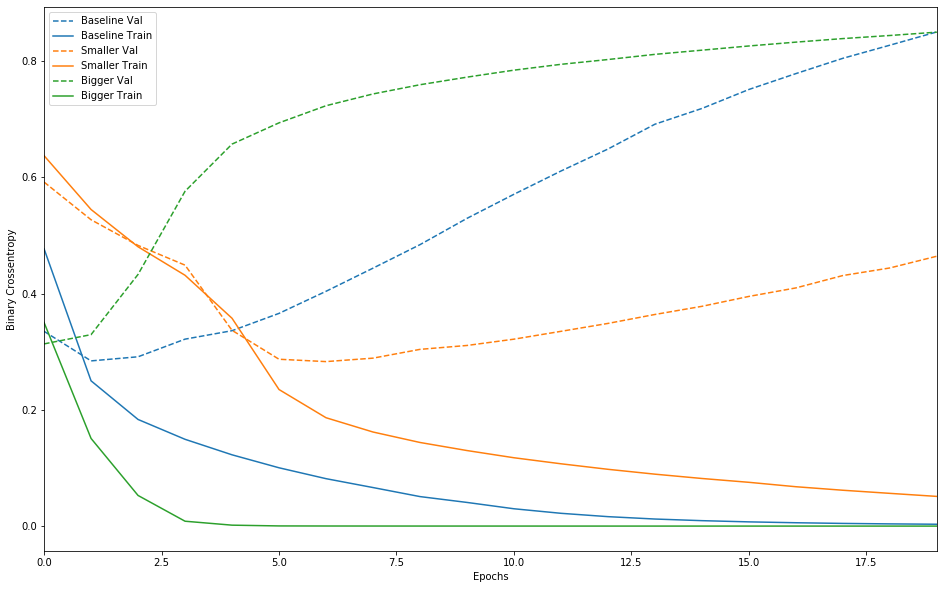

In [25]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [26]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

with mlflow.start_run(run_name="l2_model"):
    l2_model_history = l2_model.fit(train_data, train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    callbacks=[MLFlowCallback()],
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5323 - acc: 0.8082 - binary_crossentropy: 0.4938 - val_loss: 0.3815 - val_acc: 0.8800 - val_binary_crossentropy: 0.3406
Epoch 2/20
 - 4s - loss: 0.3037 - acc: 0.9089 - binary_crossentropy: 0.2576 - val_loss: 0.3359 - val_acc: 0.8876 - val_binary_crossentropy: 0.2861
Epoch 3/20
 - 4s - loss: 0.2514 - acc: 0.9304 - binary_crossentropy: 0.1989 - val_loss: 0.3391 - val_acc: 0.8859 - val_binary_crossentropy: 0.2848
Epoch 4/20
 - 4s - loss: 0.2303 - acc: 0.9403 - binary_crossentropy: 0.1741 - val_loss: 0.3567 - val_acc: 0.8800 - val_binary_crossentropy: 0.2993
Epoch 5/20
 - 4s - loss: 0.2147 - acc: 0.9481 - binary_crossentropy: 0.1562 - val_loss: 0.3663 - val_acc: 0.8785 - val_binary_crossentropy: 0.3069
Epoch 6/20
 - 4s - loss: 0.2032 - acc: 0.9529 - binary_crossentropy: 0.1428 - val_loss: 0.3778 - val_acc: 0.8759 - val_binary_crossentropy: 0.3169
Epoch 7/20
 - 4s - loss: 0.1960 - acc: 0.9556 - binary_crossentropy:

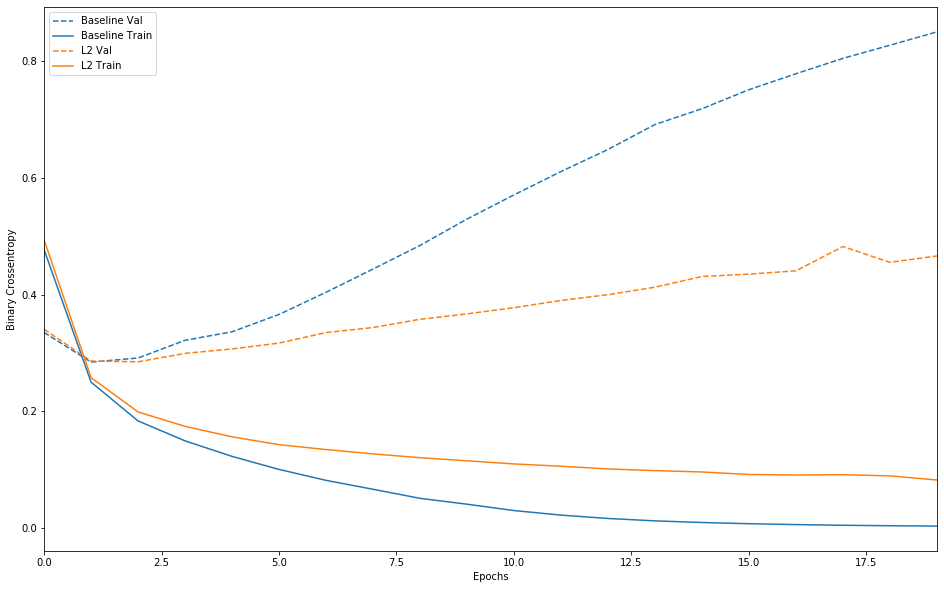

In [27]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [28]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

with mlflow.start_run(run_name="dropout_model"):
    dpt_model_history = dpt_model.fit(train_data, train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      callbacks=[MLFlowCallback()],
                                      verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6221 - acc: 0.6511 - binary_crossentropy: 0.6221 - val_loss: 0.4961 - val_acc: 0.8388 - val_binary_crossentropy: 0.4961
Epoch 2/20
 - 4s - loss: 0.4531 - acc: 0.8194 - binary_crossentropy: 0.4531 - val_loss: 0.3621 - val_acc: 0.8818 - val_binary_crossentropy: 0.3621
Epoch 3/20
 - 4s - loss: 0.3529 - acc: 0.8728 - binary_crossentropy: 0.3529 - val_loss: 0.3035 - val_acc: 0.8841 - val_binary_crossentropy: 0.3035
Epoch 4/20
 - 4s - loss: 0.2916 - acc: 0.9004 - binary_crossentropy: 0.2916 - val_loss: 0.2800 - val_acc: 0.8886 - val_binary_crossentropy: 0.2800
Epoch 5/20
 - 4s - loss: 0.2430 - acc: 0.9206 - binary_crossentropy: 0.2430 - val_loss: 0.2799 - val_acc: 0.8872 - val_binary_crossentropy: 0.2799
Epoch 6/20
 - 4s - loss: 0.2168 - acc: 0.9298 - binary_crossentropy: 0.2168 - val_loss: 0.2856 - val

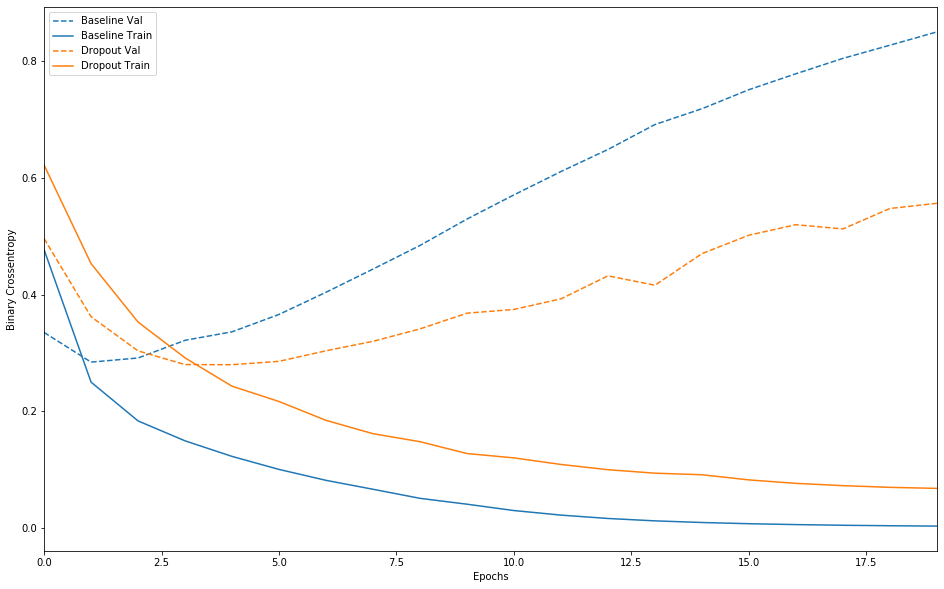

In [35]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])